In [2]:
print("Program started successfully...\n")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Program started successfully...



In [3]:
data = {
    'Brand': ['Maruti','Hyundai','Honda','Toyota','BMW','Audi','Maruti','Hyundai','Honda','Toyota'],
    'Year': [2018,2020,2017,2019,2016,2018,2021,2019,2016,2015],
    'Mileage': [45000,32000,60000,40000,55000,48000,22000,35000,72000,85000],
    'Fuel_Type': ['Petrol','Diesel','Petrol','Diesel','Diesel','Petrol','Petrol','Petrol','Diesel','Petrol'],
    'Transmission': ['Manual','Automatic','Manual','Manual','Automatic','Automatic','Manual','Manual','Manual','Automatic'],
    'Engine_CC': [1200,1500,1500,2400,2000,1800,1200,1200,1500,1800],
    'Horsepower': [82,115,119,148,190,187,83,82,98,138],
    'Owners': [1,1,2,1,2,1,1,1,2,3],
    'Condition': ['Good','Excellent','Good','Excellent','Good','Excellent','Excellent','Good','Fair','Fair'],
    'Original_Price': [700000,1500000,1000000,1800000,3500000,4000000,900000,850000,750000,1100000]
}

In [4]:
df = pd.DataFrame(data)
print("Dataset created successfully.\n")
print(df.head(), "\n")
print("Applying depreciation logic...\n")

Dataset created successfully.

     Brand  Year  Mileage Fuel_Type Transmission  Engine_CC  Horsepower  \
0   Maruti  2018    45000    Petrol       Manual       1200          82   
1  Hyundai  2020    32000    Diesel    Automatic       1500         115   
2    Honda  2017    60000    Petrol       Manual       1500         119   
3   Toyota  2019    40000    Diesel       Manual       2400         148   
4      BMW  2016    55000    Diesel    Automatic       2000         190   

   Owners  Condition  Original_Price  
0       1       Good          700000  
1       1  Excellent         1500000  
2       2       Good         1000000  
3       1  Excellent         1800000  
4       2       Good         3500000   

Applying depreciation logic...



In [5]:
def calculate_depreciated_price(original_price, year):
    current_year = 2024
    age = current_year - year
    price = original_price

    for i in range(age):
        if i == 0:
            price *= 0.85   # 15% first year
        else:
            price *= 0.90   # 10% subsequent years
    return round(price, 0)

df['Depreciated_Price'] = df.apply(
    lambda x: calculate_depreciated_price(x['Original_Price'], x['Year']),
    axis=1
)


In [6]:
print("Depreciated prices calculated.\n")
print(df[['Brand','Year','Original_Price','Depreciated_Price']], "\n")
print("Calculating car age...\n")

Depreciated prices calculated.

     Brand  Year  Original_Price  Depreciated_Price
0   Maruti  2018          700000           351342.0
1  Hyundai  2020         1500000           929475.0
2    Honda  2017         1000000           451725.0
3   Toyota  2019         1800000          1003833.0
4      BMW  2016         3500000          1422933.0
5     Audi  2018         4000000          2007666.0
6   Maruti  2021          900000           619650.0
7  Hyundai  2019          850000           474032.0
8    Honda  2016          750000           304914.0
9   Toyota  2015         1100000           402487.0 

Calculating car age...



     Brand  Mileage Fuel_Type Transmission  Engine_CC  Horsepower  Owners  \
0   Maruti    45000    Petrol       Manual       1200          82       1   
1  Hyundai    32000    Diesel    Automatic       1500         115       1   
2    Honda    60000    Petrol       Manual       1500         119       2   
3   Toyota    40000    Diesel       Manual       2400         148       1   
4      BMW    55000    Diesel    Automatic       2000         190       2   

   Condition  Original_Price  Depreciated_Price  Car_Age  
0       Good          700000           351342.0        6  
1  Excellent         1500000           929475.0        4  
2       Good         1000000           451725.0        7  
3  Excellent         1800000          1003833.0        5  
4       Good         3500000          1422933.0        8   

Encoding categorical variables...

Encoded dataset:

   Brand  Mileage  Fuel_Type  Transmission  Engine_CC  Horsepower  Owners  \
0      4    45000          1             1       12

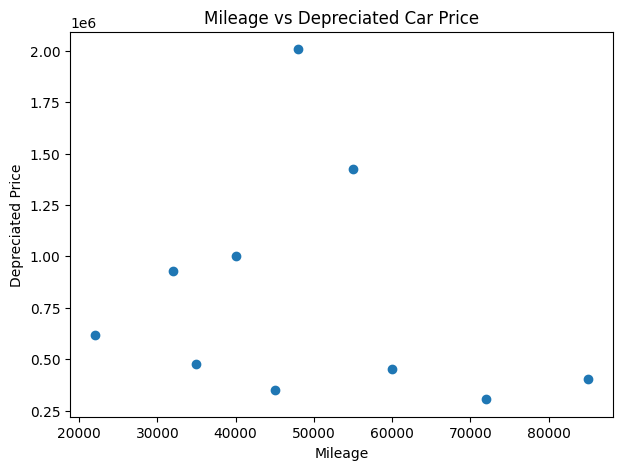

Predicting price for a new used car...

Predicted Selling Price: ₹ 1122012.0

Program executed successfully.


In [7]:
df['Car_Age'] = 2024 - df['Year']
df.drop('Year', axis=1, inplace=True)

print(df.head(), "\n")

print("Encoding categorical variables...\n")

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
encoder = LabelEncoder()

for col in ['Brand','Fuel_Type','Transmission','Condition']:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

print("Encoded dataset:\n")
print(df_encoded.head(), "\n")


print("Splitting data into training and testing sets...\n")

from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Depreciated_Price','Original_Price'], axis=1)
y = df_encoded['Depreciated_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape, "\n")

print("Training Random Forest model...\n")

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.\n")

print("Evaluating model performance...\n")

from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

print("R² Score:", round(r2_score(y_test, y_pred), 2))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2), "\n")

print("Displaying graph...\n")

plt.figure(figsize=(7,5))
plt.scatter(df['Mileage'], df['Depreciated_Price'])
plt.xlabel('Mileage')
plt.ylabel('Depreciated Price')
plt.title('Mileage vs Depreciated Car Price')
plt.show()

print("Predicting price for a new used car...\n")

new_car = pd.DataFrame({
    'Brand': [3],          # Toyota
    'Mileage': [30000],
    'Fuel_Type': [1],      # Diesel
    'Transmission': [0],   # Automatic
    'Engine_CC': [2000],
    'Horsepower': [170],
    'Owners': [1],
    'Condition': [3],      # Excellent
    'Car_Age': [4]
})

predicted_price = model.predict(new_car)

print("Predicted Selling Price: ₹", round(predicted_price[0], 0))
print("\nProgram executed successfully.")